First 5 rows of the dataset:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263       

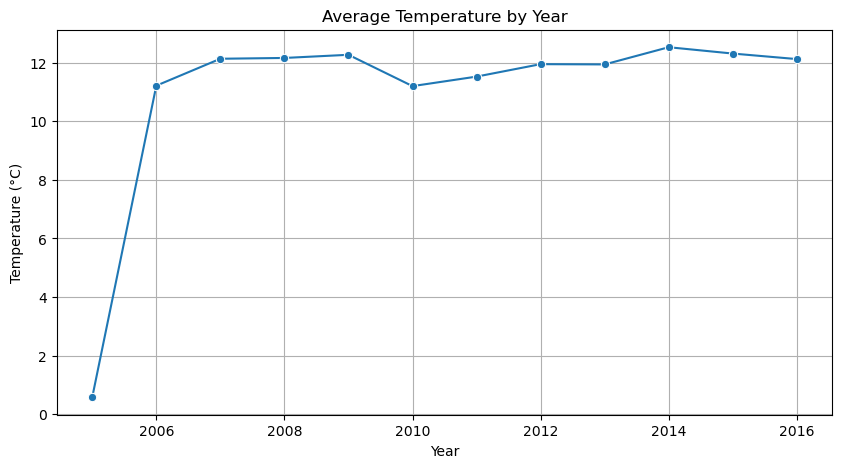

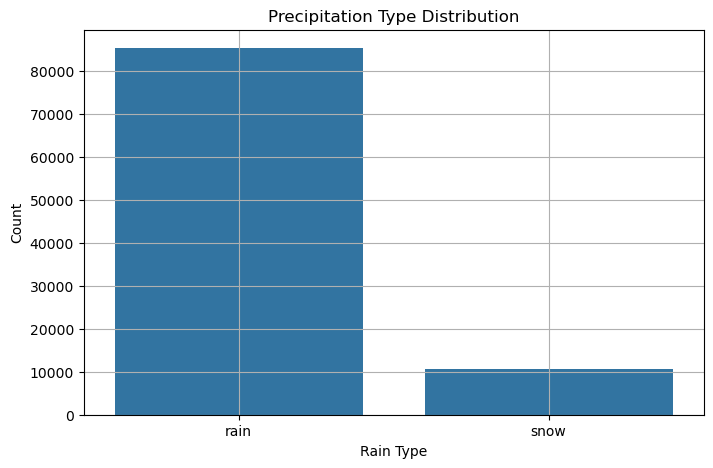

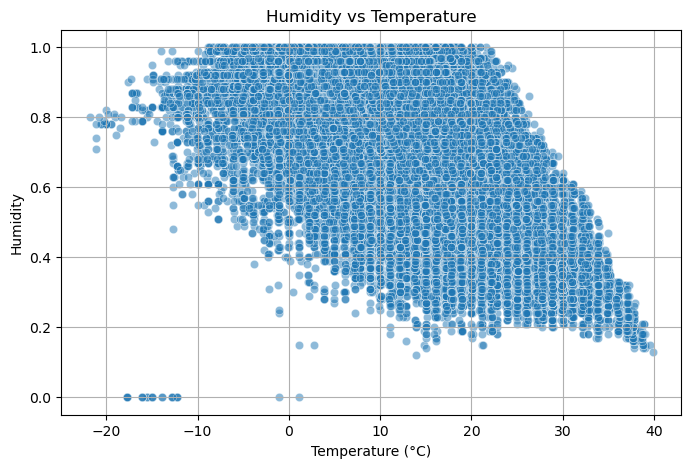

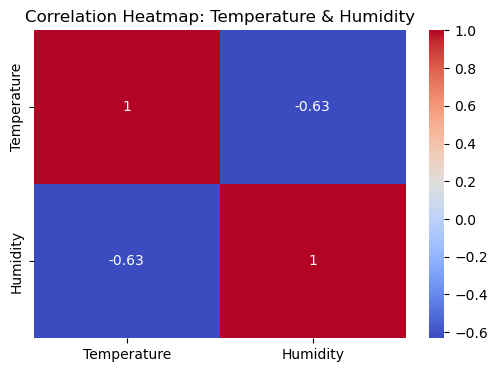


--- Model Evaluation ---
Mean Squared Error (MSE): 41.19
Root Mean Squared Error (RMSE): 6.42


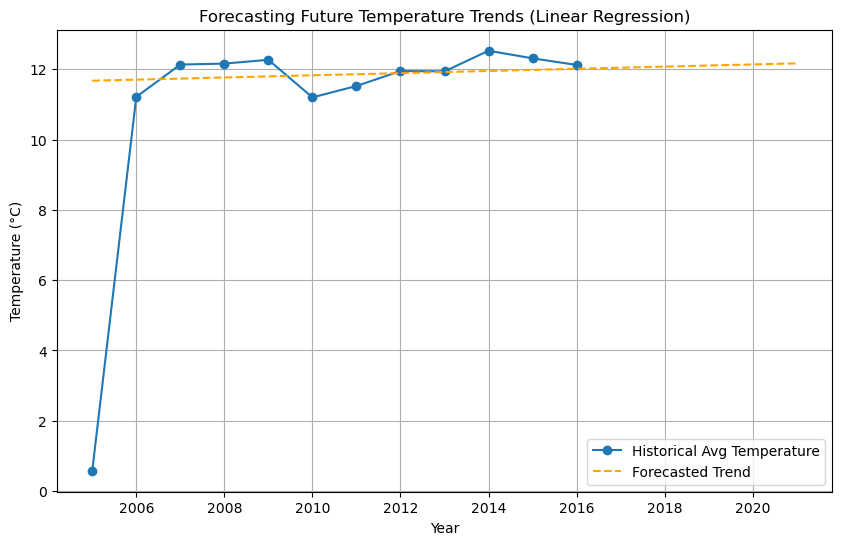

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("weatherHistory.csv")  
print("First 5 rows of the dataset:")
print(df.head())


df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Season'] = df['Month'] % 12 // 3 + 1 

df.rename(columns={'Temperature (C)': 'Temperature',
                   'Humidity': 'Humidity',
                   'Precip Type': 'RainType'}, inplace=True)


df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df.dropna(inplace=True)  # Drop any remaining rows with missing values


scaler = StandardScaler()
df[['Temperature_scaled', 'Humidity_scaled']] = scaler.fit_transform(df[['Temperature', 'Humidity']])


print("\n--- Statistical Summary ---")
print(df[['Temperature', 'Humidity']].describe())
print("\nMedian Temperature:", df['Temperature'].median())
print("Median Humidity:", df['Humidity'].median())


temp_by_year = df.groupby('Year')['Temperature'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=temp_by_year, x='Year', y='Temperature', marker='o')
plt.title("Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RainType')
plt.title("Precipitation Type Distribution")
plt.xlabel("Rain Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Temperature', y='Humidity', alpha=0.5)
plt.title("Humidity vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Temperature & Humidity")
plt.show()



X = temp_by_year[['Year']]
y = temp_by_year['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


future_years = pd.DataFrame({'Year': np.arange(X['Year'].min(), X['Year'].max() + 6)})
future_pred = model.predict(future_years)


plt.figure(figsize=(10, 6))
plt.plot(temp_by_year['Year'], temp_by_year['Temperature'], label='Historical Avg Temperature', marker='o')
plt.plot(future_years['Year'], future_pred, label='Forecasted Trend', linestyle='--', color='orange')
plt.title("Forecasting Future Temperature Trends (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
